# Optimizers

Optimizers are a key part of the algorithms that train neural networks. The original optimizer is gradient descent, and the concept of gradient descent is effectively the foundation of all optmizers (as well as fundamental to machine learning). Unlike activation functions, optimzers are a part of training the network, not a component of the network itself. In fact, the same optimizers that are used in Deep Neural Networks are used in a variety of other machine learning models as well.

Optimizers, and the parameters of optimizers, can have profound impacts on training. Similar to activation functions, there isn't a "one true optimizer". Different optimizers might perform better on different datasets or in different neural network architectures. Once again, empirical testing is a good way to suss out the effectiveness of an optimizer. 

In this lab we're going to explore several different optimizers in the context of two deep nerual network architectures and continue using the MNIST digits dataset. 

In [7]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

In [24]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    


In [33]:
# Our first model
def fresh_model_1():
    model_1 = Sequential()
    model_1.add(Dense(units=256, activation='relu', input_shape=(mnist_image_size,)))
    model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_1

# Our second model:
def fresh_model_2():
    model_2 = Sequential()
    model_2.add(Dense(units=64, activation='relu', input_shape=(mnist_image_size,)))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_2

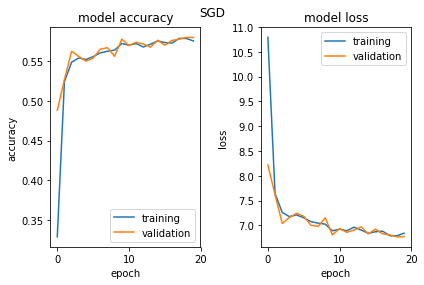

Trained in 1.03e+02 seconds
Test loss: 6.68
Test accuracy: 0.585


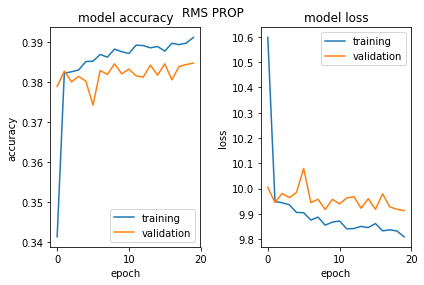

Trained in 1.22e+02 seconds
Test loss: 9.84
Test accuracy: 0.389


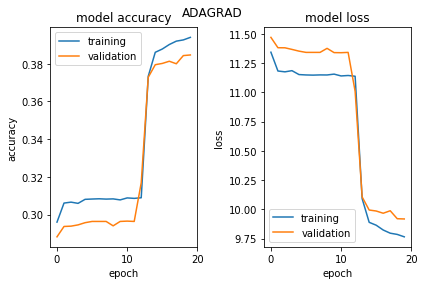

Trained in 1.18e+02 seconds
Test loss: 9.74
Test accuracy: 0.395


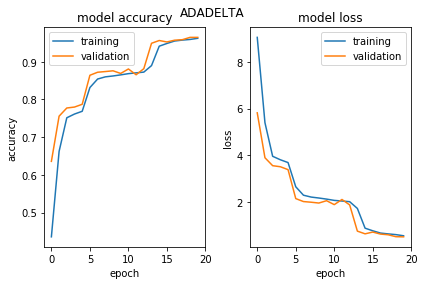

Trained in 1.51e+02 seconds
Test loss: 0.616
Test accuracy: 0.959


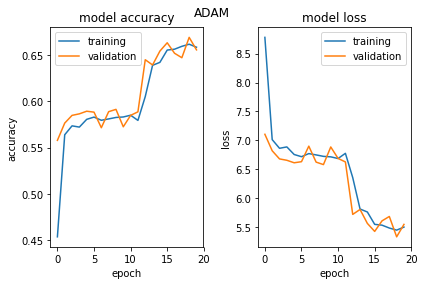

Trained in 1.42e+02 seconds
Test loss: 5.61
Test accuracy: 0.652


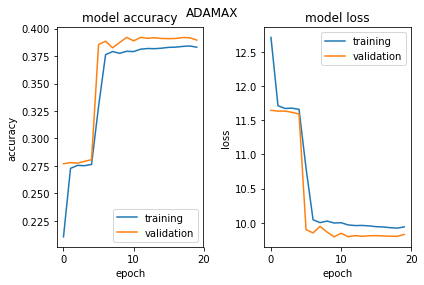

Trained in 1.42e+02 seconds
Test loss: 10.0
Test accuracy: 0.378


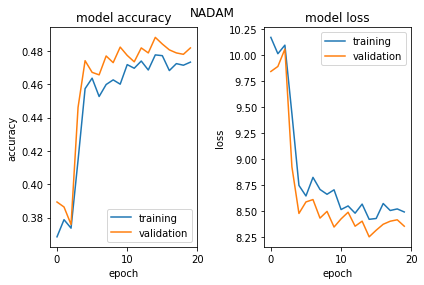

Trained in 1.55e+02 seconds
Test loss: 8.43
Test accuracy: 0.477


In [34]:
import time # Because we care about the speed of these optimizers too!

# Now, we're going to train both of these models with different optimizers
# Our goal is to compare the results and training times
sgd_model = fresh_model_1()
rmsprop_model = fresh_model_1()
adagrad_model = fresh_model_1()
adadelta_model = fresh_model_1()
adam_model = fresh_model_1()
adamax_model = fresh_model_1()
nadam_model = fresh_model_1()


# We are using the default parameters for each of these optimizers right now.
# But because of the way the optimizers work, they each have their own paramters that can
# impact training further. Keras has provided "sensible defaults" for which we are grateful
sgd_model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
adagrad_model.compile(optimizer="adagrad", loss='categorical_crossentropy', metrics=['accuracy'])
adadelta_model.compile(optimizer="adadelta", loss='categorical_crossentropy', metrics=['accuracy'])
adam_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
adamax_model.compile(optimizer="adamax", loss='categorical_crossentropy', metrics=['accuracy'])
nadam_model.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

models = [
    (sgd_model, "SGD"),
    (rmsprop_model, "RMS PROP"),
    (adagrad_model, "ADAGRAD"),
    (adadelta_model, "ADADELTA"),
    (adam_model, "ADAM"),
    (adamax_model, "ADAMAX"),
    (nadam_model, "NADAM")
]

# So we can plot them on one chart
histories = []

for model, name in models:
    start = time.process_time()
    history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, name, stop - start)
    histories.append(history)

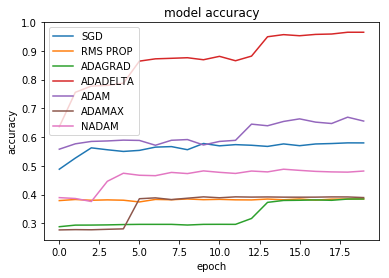

In [35]:
# Cleaner visulizations all in one place
for (model, name), history in zip(models, histories):
    plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([name for _, name in models], loc='best')
plt.show()

Note the dramatic differences between the validation accuracies! This is also a sign that this model is not excellent, otherwise more of the optimizers would work. 

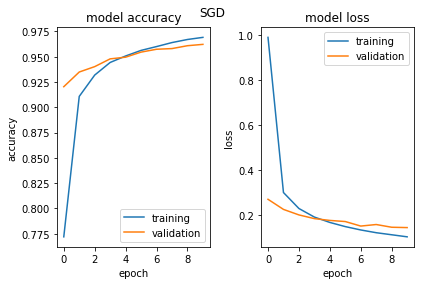

Trained in 39.9 seconds
Test loss: 0.146
Test accuracy: 0.959


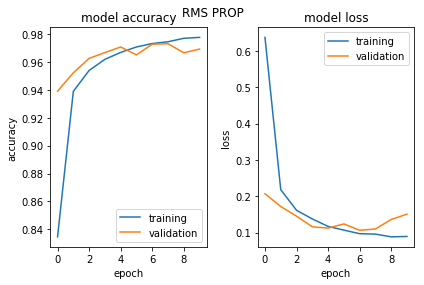

Trained in 42.2 seconds
Test loss: 0.179
Test accuracy: 0.963


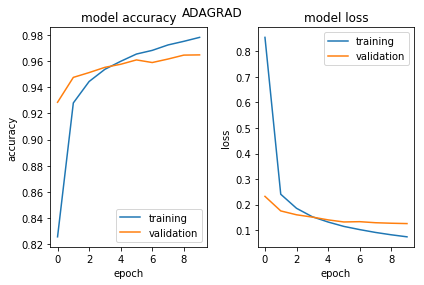

Trained in 41.7 seconds
Test loss: 0.158
Test accuracy: 0.957


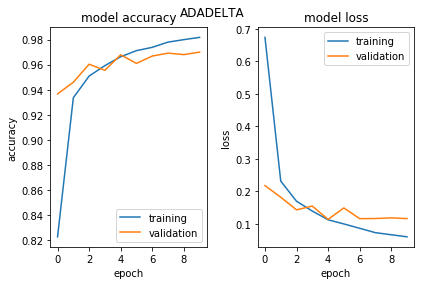

Trained in 49.7 seconds
Test loss: 0.135
Test accuracy: 0.967


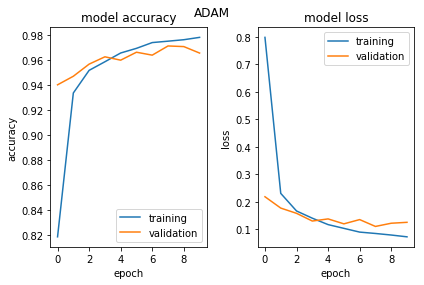

Trained in 47.2 seconds
Test loss: 0.139
Test accuracy: 0.963


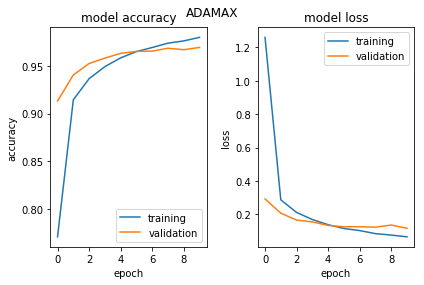

Trained in 43.8 seconds
Test loss: 0.144
Test accuracy: 0.962


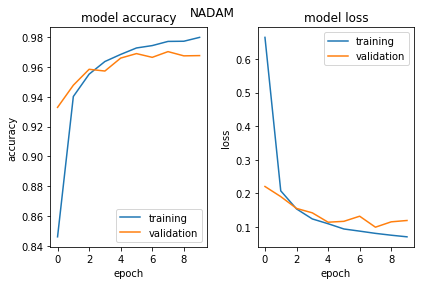

Trained in 49.7 seconds
Test loss: 0.145
Test accuracy: 0.963


In [39]:
# Now, we're going to train both of these models with different optimizers
# Our goal is to compare the results and training times
sgd_model = fresh_model_2()
rmsprop_model = fresh_model_2()
adagrad_model = fresh_model_2()
adadelta_model = fresh_model_2()
adam_model = fresh_model_2()
adamax_model = fresh_model_2()
nadam_model = fresh_model_2()

# We are using the default parameters for each of these optimizers right now.
# But because of the way the optimizers work, they each have their own paramters that can
# impact training further. Keras has provided "sensible defaults" for which we are grateful
sgd_model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
adagrad_model.compile(optimizer="adagrad", loss='categorical_crossentropy', metrics=['accuracy'])
adadelta_model.compile(optimizer="adadelta", loss='categorical_crossentropy', metrics=['accuracy'])
adam_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
adamax_model.compile(optimizer="adamax", loss='categorical_crossentropy', metrics=['accuracy'])
nadam_model.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

models = [
    (sgd_model, "SGD"),
    (rmsprop_model, "RMS PROP"),
    (adagrad_model, "ADAGRAD"),
    (adadelta_model, "ADADELTA"),
    (adam_model, "ADAM"),
    (adamax_model, "ADAMAX"),
    (nadam_model, "NADAM")
]

# So we can plot them on one chart
histories = []

for model, name in models:
    start = time.process_time()
    history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, name, stop - start)
    histories.append(history)

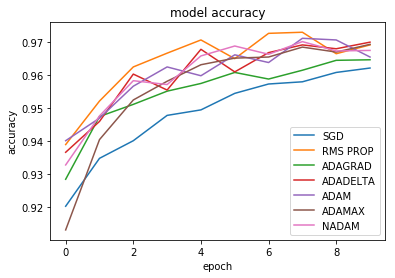

In [40]:
# Cleaner visulizations all in one place
for (model, name), history in zip(models, histories):
    plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([name for _, name in models], loc='best')
plt.show()

We can tell this model is much better, and all of the optimizers are able to achieve a 90%+ accuracy.